In [19]:
#Get the data
import yfinance as yf
import pandas as pd

#Fetch AAPL daily data for the last 5 years
aapl = yf.download('AAPL', start='2018-01-01', end='2024-12-31')
aapl.dropna(inplace = True)
aapl.tail()

/tmp/ipython-input-19-869629658.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  aapl = yf.download('AAPL', start='2018-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-12-23,254.655716,255.034791,252.840088,254.156919,40858800
2024-12-24,257.578674,257.588630,254.675658,254.875189,23234700
2024-12-26,258.396667,259.474086,257.010028,257.568678,27237100
2024-12-27,254.974930,258.077462,252.451019,257.209530,42355300
2024-12-30,251.593094,252.889969,250.146586,251.623020,35557500


In [2]:
##CREATING ML FEATURES
# ✅ Step 2: Create ML Features
# We'll add:

# Daily returns (momentum)

# Moving averages

# RSI (Relative Strength Index)

# Rolling volatility

In [20]:
!pip install ta

In [21]:

import ta

aapl = yf.download('AAPL', start='2020-01-01', end='2024-01-01')

# Momentum
aapl['return_1d'] = aapl['Close'].pct_change(1)
aapl['return_5d'] = aapl['Close'].pct_change(5)

# SMA
aapl['sma_5'] = aapl['Close'].rolling(window=5).mean()
aapl['sma_20'] = aapl['Close'].rolling(window=20).mean()

# RSI
aapl['rsi'] = ta.momentum.RSIIndicator(close=aapl['Close'].squeeze()).rsi()

# Volatility
aapl['volatility_5d'] = aapl['return_1d'].rolling(window=5).std()

# Drop missing values from indicators
aapl.dropna(inplace=True)

# Create target variable
aapl['target'] = (aapl['return_1d'].shift(-1) > 0).astype(int)

aapl.tail()


/tmp/ipython-input-21-2449447219.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  aapl = yf.download('AAPL', start='2020-01-01', end='2024-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,return_1d,return_5d,sma_5,sma_20,rsi,volatility_5d,target
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,,
Date,,,,,,,,,,,,
2023-12-22,192.192566,193.989405,191.567141,193.761066,37149600,-0.005547,-0.020094,193.769012,192.260555,54.672840,0.006438,0
2023-12-26,191.646545,192.480435,191.428144,192.202472,28919300,-0.002841,-0.014498,193.205136,192.422370,53.090018,0.005934,1
2023-12-27,191.745819,192.093281,189.700797,191.090629,48087700,0.000518,-0.019244,192.452649,192.558872,53.354430,0.004460,1
2023-12-28,192.172684,193.244834,191.765661,192.728610,34049900,0.002226,-0.006416,192.204462,192.767841,54.540954,0.003018,0
2023-12-29,191.130341,192.986741,190.336153,192.490376,42672100,-0.005424,-0.011044,191.777591,192.895905,51.121366,0.003500,0


Accuracy: 0.494949494949495
              precision    recall  f1-score   support

           0       0.47      0.64      0.54       139
           1       0.54      0.37      0.44       158

    accuracy                           0.49       297
   macro avg       0.50      0.50      0.49       297
weighted avg       0.51      0.49      0.49       297



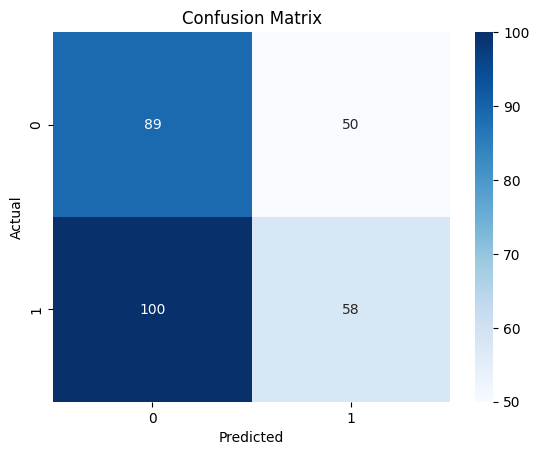

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Define Features & Target
features = ['return_1d', 'return_5d', 'sma_5', 'sma_20', 'rsi', 'volatility_5d']
X = aapl[features]
y = aapl['target']

# 2. Train-Test Split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.3)

# 3. Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 4. Predict & Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Optional: Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()